In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, Dropout, Dense, Flatten

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential, load_model
import tensorflow as tf
import numpy as np
import os

Using TensorFlow backend.


In [0]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14


In [3]:
!unzip test.zip


Archive:  test.zip
   creating: test/
  inflating: test/._.DS_Store        
  inflating: test/.DS_Store          
   creating: test/FIVE/
  inflating: test/FIVE/FIVE_0.png    
  inflating: test/FIVE/FIVE_1.png    
  inflating: test/FIVE/FIVE_10.png   
  inflating: test/FIVE/FIVE_100.png  
  inflating: test/FIVE/FIVE_101.png  
  inflating: test/FIVE/FIVE_102.png  
  inflating: test/FIVE/FIVE_103.png  
  inflating: test/FIVE/FIVE_104.png  
  inflating: test/FIVE/FIVE_105.png  
  inflating: test/FIVE/FIVE_106.png  
  inflating: test/FIVE/FIVE_107.png  
  inflating: test/FIVE/FIVE_108.png  
  inflating: test/FIVE/FIVE_109.png  
  inflating: test/FIVE/FIVE_11.png   
  inflating: test/FIVE/FIVE_110.png  
  inflating: test/FIVE/FIVE_111.png  
  inflating: test/FIVE/FIVE_112.png  
  inflating: test/FIVE/FIVE_113.png  
  inflating: test/FIVE/FIVE_114.png  
  inflating: test/FIVE/FIVE_115.png  
  inflating: test/FIVE/FIVE_116.png  
  inflating: test/FIVE/FIVE_117.png  
  inflating: test/FIVE/FIV

In [4]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/NONE/NONE_1145.png  
  inflating: train/NONE/NONE_1147.png  
  inflating: train/NONE/NONE_1148.png  
  inflating: train/NONE/NONE_1150.png  
  inflating: train/NONE/NONE_1159.png  
  inflating: train/NONE/NONE_1161.png  
  inflating: train/NONE/NONE_1164.png  
  inflating: train/NONE/NONE_1165.png  
  inflating: train/NONE/NONE_1175.png  
  inflating: train/NONE/NONE_1177.png  
  inflating: train/NONE/NONE_1178.png  
  inflating: train/NONE/NONE_118.png  
  inflating: train/NONE/NONE_1180.png  
  inflating: train/NONE/NONE_1181.png  
  inflating: train/NONE/NONE_1183.png  
  inflating: train/NONE/NONE_1185.png  
  inflating: train/NONE/NONE_1188.png  
  inflating: train/NONE/NONE_1190.png  
  inflating: train/NONE/NONE_1191.png  
  inflating: train/NONE/NONE_1192.png  
  inflating: train/NONE/NONE_1194.png  
  inflating: train/NONE/NONE_1199.png  
  inflating: train/NONE/NONE_120.png  
  inflating: train/NONE/NONE_12

In [5]:
nbatch = 32
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=12., width_shift_range=0.2, height_shift_range=0.2,
                                   zoom_range=0.15, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory('train/',
                                              target_size=(256, 256),
                                              color_mode = 'grayscale', 
                                              batch_size = nbatch,
                                              classes=['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                                              class_mode = 'categorical')
test_gen = test_datagen.flow_from_directory('test/',
                                            target_size=(256, 256), 
                                            color_mode = 'grayscale', 
                                            batch_size = nbatch, 
                                            classes=['NONE', 'ONE', 'TWO', 'THREE', 'FOUR', 'FIVE'],
                                            class_mode = 'categorical')




Found 9081 images belonging to 6 classes.
Found 3632 images belonging to 6 classes.


(32, 256, 256, 1) (32, 6)


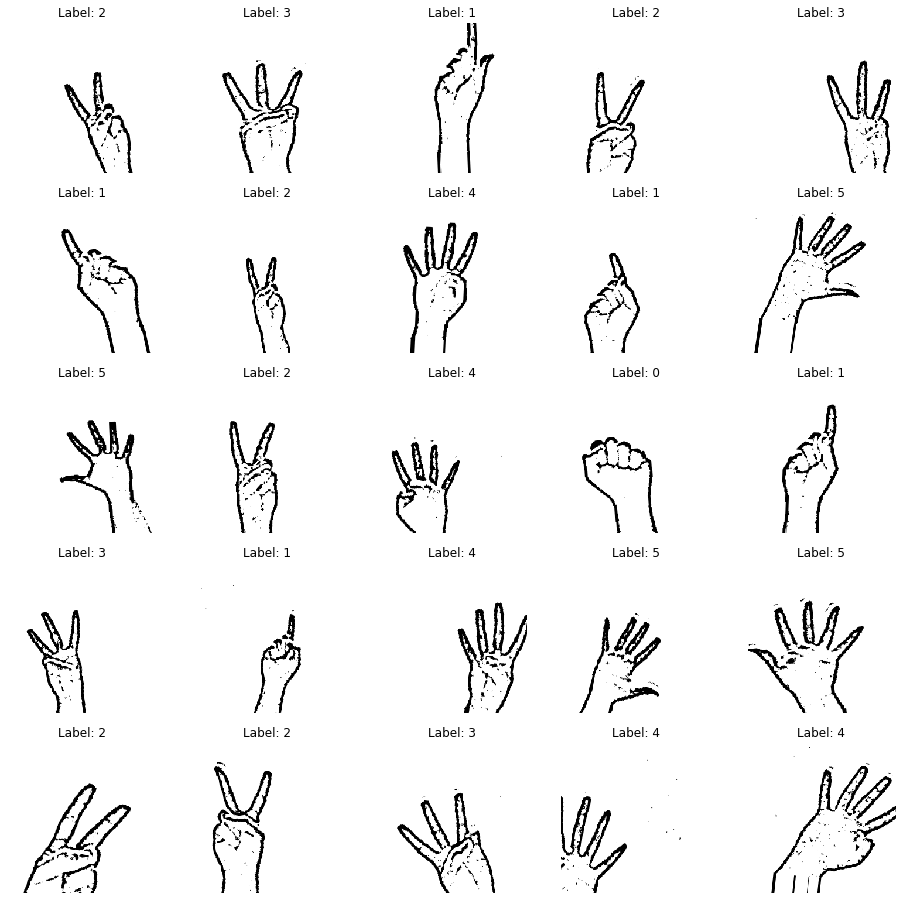

In [6]:
for X, y in train_gen:
  print(X.shape, y.shape)
  
  plt.figure(figsize=(16, 16))
  for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.axis('off')
    plt.title('Label: %d' % np.argmax(y[i]))
    img = np.uint8(255*X[i, :, :, 0])
    plt.imshow(img, cmap='gray')
  break

In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256,256,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(6, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 254, 254, 32)      320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 125, 125, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 123, 123, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 61, 61, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 59, 59, 128)       73856     


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [0]:
callbacks_list = [
                  EarlyStopping(monitor='val_loss', patience=10),
                  ModelCheckpoint(filepath='model_6cat.h6', monitor='val_loss', save_best_only=True),
]

In [10]:
os.environ["CUDA_VISIBLE_DEVICES"]="0"
with tf.device('/GPU:0'):
  history = model.fit_generator(
      train_gen, 
      steps_per_epoch=64, 
      epochs=200, 
      validation_data=test_gen, 
      validation_steps=28,
      callbacks=callbacks_list
  )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/200





64/64 [==============================] - 495s 8s/step - loss: 1.7845 - acc: 0.1919 - val_loss: 1.6006 - val_acc: 0.3460
Epoch 2/200
64/64 [==============================] - 486s 8s/step - loss: 1.4149 - acc: 0.3745 - val_loss: 0.9839 - val_acc: 0.6049
Epoch 3/200
64/64 [==============================] - 485s 8s/step - loss: 1.0475 - acc: 0.5386 - val_loss: 0.6224 - val_acc: 0.7232
Epoch 4/200
64/64 [==============================] - 473s 7s/step - loss: 0.8902 - acc: 0.6126 - val_loss: 0.4413 - val_acc: 0.8114
Epoch 5/200
64/64 [==============================] - 469s 7s/step - loss: 0.7234 - acc: 0.6846 - val_loss: 0.3885 - val_acc: 0.8409
Epoch 6/200
64/64 [==============================] - 489s 8s/step - loss: 0.6420 - acc: 0.7417 - val_loss: 0.2113 - val_acc: 0.9498
Epoch 7/200
64/64 [==============================] - 494s 8s/step - loss: 0.4839 - acc: 0.8088 - val_loss:

Text(0.5, 0, 'number of epochs')

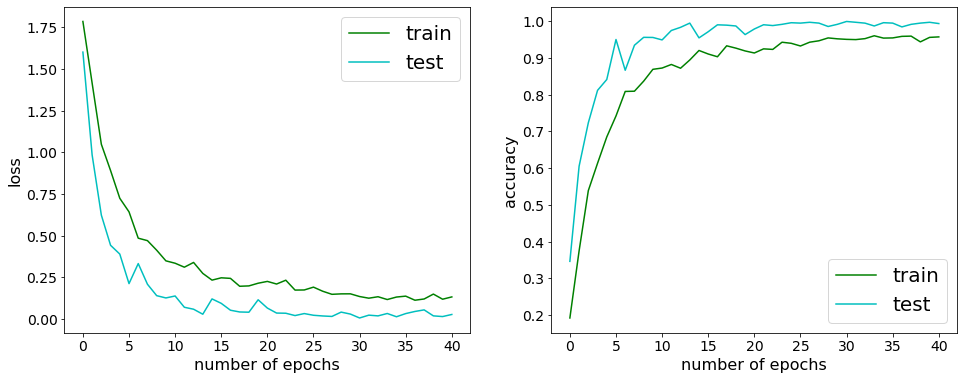

In [11]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
nepochs=len(history.history['loss'])
plt.plot(range(nepochs), history.history['loss'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_loss'], 'c-', label='test')
plt.legend(prop={'size':20})
plt.ylabel('loss')
plt.xlabel('number of epochs')
plt.subplot(1, 2, 2)
plt.plot(range(nepochs), history.history['acc'], 'g-', label='train')
plt.plot(range(nepochs), history.history['val_acc'], 'c-', label='test')
plt.legend(prop={'size':20})
plt.ylabel('accuracy')
plt.xlabel('number of epochs')


https://medium.com/@aggirma/keras-convolutional-neural-network-cnn-implementation-for-hand-gesture-recognition-d7dd11958af6

In [12]:
X_test, y_test = [], []
for ibatch, (X, y) in enumerate(test_gen):
  X_test.append(X)
  y_test.append(y)
  ibatch += 1
  if(ibatch == 5*28):break

X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)
y_test = np.int32([np.argmax(r) for r in y_test])

y_pred = np.int32([np.argmax(r) for r in model.predict(X_test)])
match = (y_pred == y_test)
print("Testing Acc : %.2f%%" % (np.sum(match)*100/match.shape[0]))


Testing Acc : 99.53%


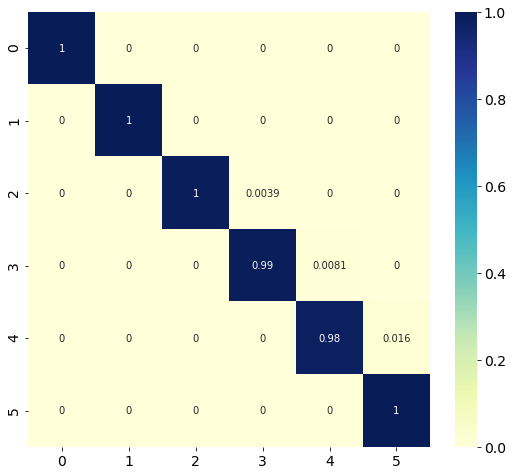

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
plt.figure(figsize=(9, 8))
cm = confusion_matrix(y_test, y_pred)
cm = cm/cm.sum(axis=1)
sn.heatmap(cm, annot=True, cmap="YlGnBu");